In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1.  Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.  (6 = 2012, 7 = 2014)

In [4]:
print(df['ppltrst'].mean())
means_yr = df.groupby('year').mean()
print(means_yr['ppltrst'])

5.5599067599067595
year
6    5.563098
7    5.556720
Name: ppltrst, dtype: float64


In [5]:
df.groupby(['cntry', 'year']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.141192  5.677878  6.350649  5.726329  8.088312   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.142420  4.362519  4.959938  4.503058  6.770898   
      7     1.445666e+03  4.686930  4.424658  4.904255  4.465753  6.914110   
DE    6     1.100048e+07  4.928571  5.214286  5.692308  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.354253  4.748344  7.548680   
      7     1.467607e+03  4.015677  4.895128  5.340284  4.326716  7.419967   
NO    6     1.430671e+04  3.837209  6.649315  6.927298  6.085048  8.251719   
      7     1.430671e+04  3.705882  6.598630  6.861454  6.001374  7.915185   
SE    6     1.765173e+03  3.691630  6.058499  6.559116  6.039691  7.907387   
      7     1.765173e+03  3.585447  6.257709  6.836464  6.082781  7.946961   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.080519  2.704724  1.514877  47.344415  1.349288  
      7     5.160622  2.781699  1.512290  46.141145  1.376455  
CZ    6     4.648855  2.613354  1.515198  47.053208  1.432927  
      7     4.445802  2.703077  1.535494  45.552262  1.420245  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.228737  2.560266  1.515251  47.700340  1.372727  
      7     5.260116  2.616878  1.493817  48.048223  1.398347  
NO    6     5.530780  2.965565  1.471956  46.364903  1.348422  
      7     5.302326  2.859097  1.461012  46.707521  1.390411  
SE    6     5.528115  2.917960  1.471366  48.673563  1.387665  
      7     5.426211  2.879425  1.482379  49.403189  1.386564

In [6]:
df.shape

(8594, 13)

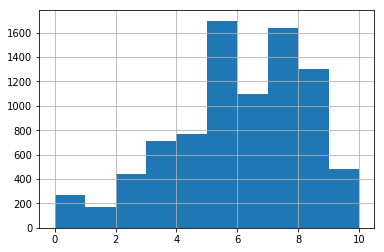

In [7]:
df['ppltrst'].hist()
plt.show()

Distribution is fairly normal, so the mean values were used.  All of the countries became slightly more trusting except for ES and NO (Spain and Norway).  The mean of Spain trust moved from 5.11 to 4.90.  The mean of Norway trust moved from 6.65 to 6.60.  The overall results of trust moved from 6.563 to 6.557 which is a slight decrease.  Is this slight decrease significant ?  It is not significant.

In [8]:
means_yr

,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
year,,,,,,,,,,,
6,39549.380033,3.923095,5.563098,5.997896,5.388837,7.723573,5.227612,2.740296,1.498720,47.524814,1.376690
7,39549.380033,3.800931,5.556720,6.012389,5.250991,7.665734,5.157539,2.757590,1.495685,47.416826,1.393049


In [9]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [10]:
df_2012 = df.drop(df[df.year == 7].index)

In [11]:
df_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [12]:
df_2012.shape

(4297, 13)

In [13]:
df_2014 = df.drop(df[df.year == 6].index)

In [14]:
df_2012['ppltrst'].median()

6.0

In [15]:
df_2014['ppltrst'].median()

6.0

In [16]:
df_2012['ppltrst'].mode()

0    7.0
dtype: float64

In [17]:
df_2014['ppltrst'].mode()

0    5.0
dtype: float64

In [18]:
df_2012.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
7681,SE,3729.0,6,1.0,5.0,5.0,7.0,7.0,7.0,4.0,2.0,15.0,2.0
7682,SE,3732.0,6,3.0,3.0,7.0,7.0,5.0,6.0,2.0,2.0,16.0,2.0
7683,SE,3743.0,6,4.0,6.0,6.0,5.0,7.0,6.0,4.0,1.0,15.0,2.0
7684,SE,3744.0,6,0.0,6.0,7.0,2.0,9.0,7.0,3.0,2.0,15.0,2.0
7685,SE,3746.0,6,7.0,5.0,10.0,6.0,10.0,3.0,2.0,2.0,15.0,2.0


In [19]:
ttest_ind(df_2012['ppltrst'].dropna(), df_2014['ppltrst'].dropna())

Ttest_indResult(statistic=0.13222510058441272, pvalue=0.8948093492496576)

### 2.  Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [20]:
df.groupby(['cntry', 'year']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.141192  5.677878  6.350649  5.726329  8.088312   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.142420  4.362519  4.959938  4.503058  6.770898   
      7     1.445666e+03  4.686930  4.424658  4.904255  4.465753  6.914110   
DE    6     1.100048e+07  4.928571  5.214286  5.692308  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.354253  4.748344  7.548680   
      7     1.467607e+03  4.015677  4.895128  5.340284  4.326716  7.419967   
NO    6     1.430671e+04  3.837209  6.649315  6.927298  6.085048  8.251719   
      7     1.430671e+04  3.705882  6.598630  6.861454  6.001374  7.915185   
SE    6     1.765173e+03  3.691630  6.058499  6.559116  6.039691  7.907387   
      7     1.765173e+03  3.585447  6.257709  6.836464  6.082781  7.946961   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.080519  2.704724  1.514877  47.344415  1.349288  
      7     5.160622  2.781699  1.512290  46.141145  1.376455  
CZ    6     4.648855  2.613354  1.515198  47.053208  1.432927  
      7     4.445802  2.703077  1.535494  45.552262  1.420245  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.228737  2.560266  1.515251  47.700340  1.372727  
      7     5.260116  2.616878  1.493817  48.048223  1.398347  
NO    6     5.530780  2.965565  1.471956  46.364903  1.348422  
      7     5.302326  2.859097  1.461012  46.707521  1.390411  
SE    6     5.528115  2.917960  1.471366  48.673563  1.387665  
      7     5.426211  2.879425  1.482379  49.403189  1.386564

In [21]:
print(df['happy'].mean())
means_happy = df.groupby('year').mean()
print(means_happy['happy'])

7.6946163727665535
year
6    7.723573
7    7.665734
Name: happy, dtype: float64


People did not become happier from 2012 to 2014.  Their overall happiness decreased a little.  

### 3.  Who reported watching more TV in 2012, men or women? (1 = male, 2 = female)

In [22]:
df.groupby(['gndr']).mean()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,partner
gndr,,,,,,,,,,,
1.0,34458.267841,6.500927,3.825603,5.628565,5.958343,5.233682,7.729786,5.178613,2.780905,46.973037,1.364354
2.0,44786.048500,6.497891,3.892589,5.490251,6.053202,5.406206,7.660391,5.210427,2.716584,47.922966,1.404180


Females wathed slightly more television than men.  The mean values are slightly higher for women; also, the value counts of number 7 - which is more than 3 hours - was higher for women.

In [23]:
df_tvtot = df.groupby(['gndr'])

In [24]:
df_tvtot['tvtot'].value_counts()

gndr  tvtot
1.0   3.0      748
      2.0      715
      4.0      677
      5.0      613
      7.0      600
      6.0      414
      1.0      365
      0.0      180
2.0   4.0      727
      2.0      720
      7.0      664
      3.0      644
      5.0      602
      6.0      389
      1.0      326
      0.0      192
Name: tvtot, dtype: int64

### 4.  Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? ( 1 = lives with partner, 2 = lives alone)

In [25]:
df.groupby(['partner', 'year']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
partner year                                                                   
1.0     6     40822.379207  3.958427  5.660172  6.080736  5.471139  7.966979   
        7     54405.184858  3.843522  5.590542  6.046610  5.257891  7.822556   
2.0     6     37591.420792  3.855638  5.396648  5.856965  5.249533  7.319202   
        7     16827.737685  3.740499  5.504756  5.963517  5.243597  7.422871   

               sclmeet    sclact      gndr       agea  
partner year                                           
1.0     6     5.054389  2.720965  1.479806  50.745075  
        7     4.962264  2.770160  1.481937  51.457788  
2.0     6     5.513932  2.772756  1.529084  42.215873  
        7     5.461995  2.739833  1.517015  41.301635

People living with a partner had an average higher fairness score.  Is this significant ?  Fairness score equals **6.08** for living with a partner and **5.86** for people living alone.

In [26]:
df_partner = df.drop(df[df.partner == 2].index)
df_alone = df.drop(df[df.partner == 1].index)
df_partner_2012 = df_partner.drop(df_partner[df_partner.year == 7].index)
df_alone_2012 = df_alone.drop(df_alone[df_alone.year == 7].index)

In [27]:
df_partner_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0


In [28]:
ttest_ind(df_partner_2012['ppltrst'].dropna(), df_alone_2012['ppltrst'].dropna())

Ttest_indResult(statistic=3.704026056171666, pvalue=0.00021487374789776374)

The difference in these two values are significant from the calculated p-value above (which is less than .05), so people living with a partner in 2012 were more likely to belive people were fair than those living alone.

### 5.  Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [29]:
df.groupby(['cntry', 'year']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.141192  5.677878  6.350649  5.726329  8.088312   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.142420  4.362519  4.959938  4.503058  6.770898   
      7     1.445666e+03  4.686930  4.424658  4.904255  4.465753  6.914110   
DE    6     1.100048e+07  4.928571  5.214286  5.692308  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.354253  4.748344  7.548680   
      7     1.467607e+03  4.015677  4.895128  5.340284  4.326716  7.419967   
NO    6     1.430671e+04  3.837209  6.649315  6.927298  6.085048  8.251719   
      7     1.430671e+04  3.705882  6.598630  6.861454  6.001374  7.915185   
SE    6     1.765173e+03  3.691630  6.058499  6.559116  6.039691  7.907387   
      7     1.765173e+03  3.585447  6.257709  6.836464  6.082781  7.946961   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.080519  2.704724  1.514877  47.344415  1.349288  
      7     5.160622  2.781699  1.512290  46.141145  1.376455  
CZ    6     4.648855  2.613354  1.515198  47.053208  1.432927  
      7     4.445802  2.703077  1.535494  45.552262  1.420245  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.228737  2.560266  1.515251  47.700340  1.372727  
      7     5.260116  2.616878  1.493817  48.048223  1.398347  
NO    6     5.530780  2.965565  1.471956  46.364903  1.348422  
      7     5.302326  2.859097  1.461012  46.707521  1.390411  
SE    6     5.528115  2.917960  1.471366  48.673563  1.387665  
      7     5.426211  2.879425  1.482379  49.403189  1.386564

In [30]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


For CH, CZ and SE:

In [31]:
df_CH = df.drop(df[df.cntry != 'CH'].index)
df_CH_2014 = df_CH.drop(df_CH[df_CH.year == 6].index)

In [32]:
df_CH.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
1541,CH,2890.0,7,5.0,4.0,6.0,2.0,10.0,6.0,4.0,1.0,38.0,1.0
1542,CH,2893.0,7,2.0,5.0,5.0,5.0,9.0,3.0,2.0,2.0,61.0,1.0
1543,CH,2894.0,7,5.0,7.0,6.0,5.0,7.0,3.0,2.0,2.0,56.0,1.0
1544,CH,2900.0,7,3.0,3.0,7.0,7.0,8.0,6.0,4.0,2.0,20.0,1.0
1545,CH,2905.0,7,4.0,5.0,6.0,6.0,8.0,4.0,3.0,1.0,19.0,2.0


In [33]:
df_CZ = df.drop(df[df.cntry != 'CZ'].index)
df_SE = df.drop(df[df.cntry != 'SE'].index)
df_CZ_2014 = df_CZ.drop(df_CZ[df_CZ.year == 6].index)
df_SE_2014 = df_SE.drop(df_SE[df_SE.year == 6].index)

In [34]:
df_CZ.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
1546,CZ,1001.0,6,2.0,10.0,9.0,4.0,9.0,6.0,3.0,1.0,39.0,1.0
1547,CZ,1002.0,6,4.0,5.0,4.0,6.0,8.0,6.0,3.0,1.0,29.0,1.0
1548,CZ,1003.0,6,1.0,9.0,8.0,6.0,9.0,5.0,5.0,1.0,33.0,2.0
1549,CZ,1004.0,6,3.0,2.0,1.0,2.0,7.0,4.0,3.0,1.0,24.0,2.0
1550,CZ,1005.0,6,7.0,2.0,10.0,6.0,4.0,5.0,3.0,2.0,63.0,2.0


In [35]:
F, p = stats.f_oneway(df_CH['sclmeet'].dropna(), df_CZ['sclmeet'].dropna(), df_SE['sclmeet'].dropna())

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

162.6921614368998
5.005103273003701e-69


In [36]:
print(stats.ttest_ind(df_CH['sclmeet'].dropna(), df_CZ['sclmeet'].dropna()))
print(stats.ttest_ind(df_CZ['sclmeet'].dropna(), df_SE['sclmeet'].dropna()))
print(stats.ttest_ind(df_CH['sclmeet'].dropna(), df_SE['sclmeet'].dropna()))

Ttest_indResult(statistic=10.541714676171589, pvalue=1.6254396980644212e-25)
Ttest_indResult(statistic=-17.45376983430756, pvalue=3.623514217729992e-65)
Ttest_indResult(statistic=-7.5868110445067725, pvalue=4.220664963998903e-14)


All of these values are significantly different.  The difference is greatest between CZ (Czech Republic) and SE (Sweden).  People in Sweden meet up socially the most of any country.

### 6.  Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [37]:
df.groupby(['cntry', 'year']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.141192  5.677878  6.350649  5.726329  8.088312   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.142420  4.362519  4.959938  4.503058  6.770898   
      7     1.445666e+03  4.686930  4.424658  4.904255  4.465753  6.914110   
DE    6     1.100048e+07  4.928571  5.214286  5.692308  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.354253  4.748344  7.548680   
      7     1.467607e+03  4.015677  4.895128  5.340284  4.326716  7.419967   
NO    6     1.430671e+04  3.837209  6.649315  6.927298  6.085048  8.251719   
      7     1.430671e+04  3.705882  6.598630  6.861454  6.001374  7.915185   
SE    6     1.765173e+03  3.691630  6.058499  6.559116  6.039691  7.907387   
      7     1.765173e+03  3.585447  6.257709  6.836464  6.082781  7.946961   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.080519  2.704724  1.514877  47.344415  1.349288  
      7     5.160622  2.781699  1.512290  46.141145  1.376455  
CZ    6     4.648855  2.613354  1.515198  47.053208  1.432927  
      7     4.445802  2.703077  1.535494  45.552262  1.420245  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.228737  2.560266  1.515251  47.700340  1.372727  
      7     5.260116  2.616878  1.493817  48.048223  1.398347  
NO    6     5.530780  2.965565  1.471956  46.364903  1.348422  
      7     5.302326  2.859097  1.461012  46.707521  1.390411  
SE    6     5.528115  2.917960  1.471366  48.673563  1.387665  
      7     5.426211  2.879425  1.482379  49.403189  1.386564

In [38]:
F, p = stats.f_oneway(df_CH_2014['sclact'].dropna(), df_CZ_2014['sclact'].dropna(), df_SE_2014['sclact'].dropna())

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

7.858723718923074
0.00039676067687261147


The p value is less than .05 which says that at least one of the differences is significant.  To find out the individual differences:

In [39]:
print(stats.ttest_ind(df_CH_2014['sclact'].dropna(), df_CZ_2014['sclact'].dropna()))
print(stats.ttest_ind(df_CZ_2014['sclact'].dropna(), df_SE_2014['sclact'].dropna()))
print(stats.ttest_ind(df_CH_2014['sclact'].dropna(), df_SE_2014['sclact'].dropna()))

Ttest_indResult(statistic=1.665721791943212, pvalue=0.09599050025440872)
Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.580214302799725e-05)
Ttest_indResult(statistic=-2.247107750003853, pvalue=0.024763496042596676)


The most significant difference is between Chech Republic and Sweden for 2014.  People in Sweden feel they met more frequently for social activities (2.9 vs 2.8 times) relative to other people the same age.